In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Fonctions


In [7]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [8]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [9]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [10]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [11]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [12]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [13]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):

    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # Update
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train loss')
    plt.plot(test_loss, label='Test loss')
    plt.title("Loss")
    plt.xlabel("Iteration (x10)")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train accuracy')
    plt.plot(test_acc, label='Test accuracy')
    plt.title("Accuracy")
    plt.xlabel("Iteration (x10)")
    plt.legend()
    plt.show()

    return (W, b)

# Dataset

In [ ]:
!pip install h5py

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_data():
    train_dataset = h5py.File('sample_data/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # Images
    y_train = np.array(train_dataset["Y_train"][:]) # Libellés

    test_dataset = h5py.File('sample_data/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # Images
    y_test = np.array(test_dataset["Y_test"][:]) # Libellés

    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


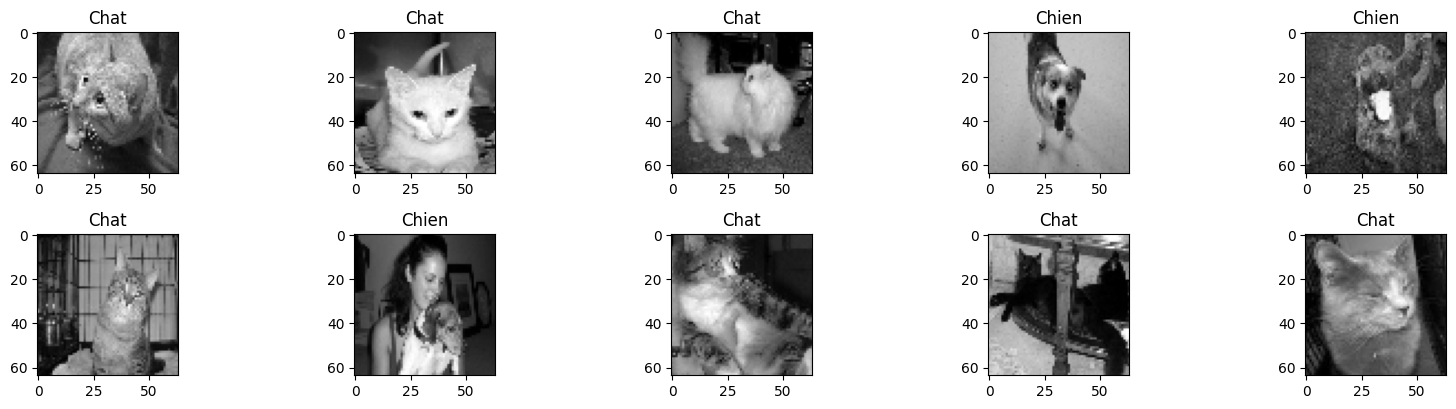

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray') # Images en nuances en gris
    plt.title("Chat" if y_train[i] == [0.] else 'Chien')
    plt.tight_layout()
plt.show()

# Exercice
 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
 (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn à la place !)
 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)


In [ ]:
# Applatissement des matrices
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


# Normalisation (teinte dans [0-1]) :
X_train = X_train/255
X_test = X_test/255

print(X_train.shape)
print(X_train)

(1000, 4096)
[[0.64313725 0.68235294 0.63921569 ... 0.34117647 0.70588235 0.15294118]
 [0.16470588 0.16862745 0.15294118 ... 0.21568627 0.20392157 0.21568627]
 [0.10588235 0.10196078 0.11372549 ... 0.52941176 0.55294118 0.4745098 ]
 ...
 [0.18431373 0.26666667 0.55686275 ... 0.79215686 0.79215686 0.79607843]
 [0.98823529 0.98823529 0.98823529 ... 0.25098039 0.25882353 0.23137255]
 [0.47843137 0.49411765 0.50980392 ... 0.63137255 0.62745098 0.62745098]]


100%|██████████| 10000/10000 [01:24<00:00, 118.04it/s]


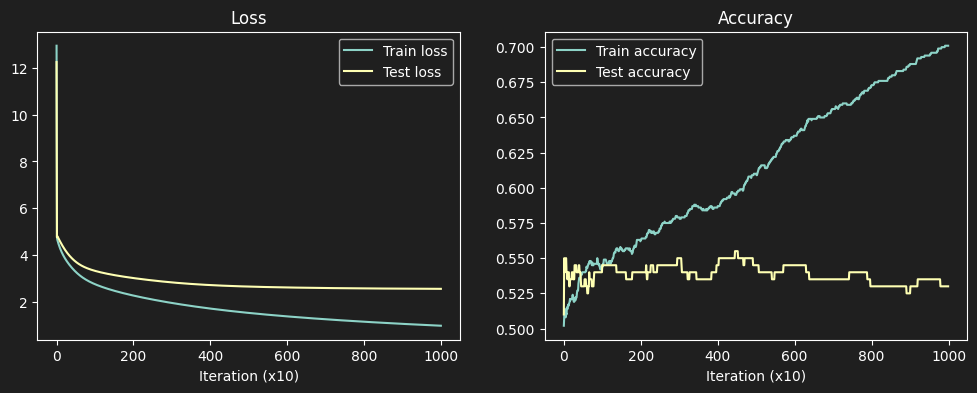

In [ ]:
# Entrainement
W, b = artificial_neuron(X_train, y_train, X_test, y_test, 0.01, 10000)

# Experience sur la normalisation


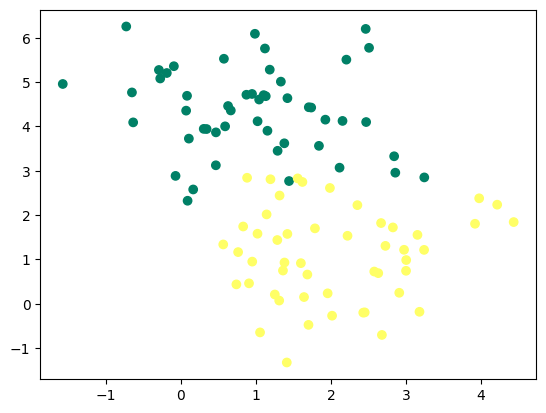

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1

y = y.reshape(y.shape[0], 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [5]:
def artificial_neuron_2(X, y, learning_rate=0.1, n_iter=1000):

  W, b = initialisation(X)
  W[0], W[1] = -7.5, 7.5

  nb = 1
  j=0
  history = np.zeros((n_iter // nb, 5))

  A = model(X, W, b)
  Loss = []


  Params1 = [W[0]]
  Params2 = [W[1]]
  Loss.append(log_loss(y, A))

  # Training
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(y, A))
    Params1.append(W[0])
    Params2.append(W[1])
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate = learning_rate)

    if (i % nb == 0):
      history[j, 0] = W[0]
      history[j, 1] = W[1]
      history[j, 2] = b
      history[j, 3] = i
      history[j, 4] = log_loss(y, A)
      j +=1

  plt.plot(Loss)
  plt.show()

  return history, b, Loss, Params1, Params2

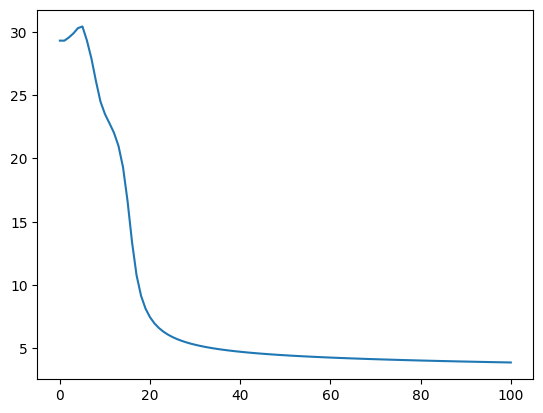

In [14]:
history, b, Loss, Params1, Params2 = artificial_neuron_2(X, y, learning_rate=0.6, n_iter=100)

In [15]:
lim = 15
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [16]:
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

In [22]:
from matplotlib.animation import FuncAnimation

In [17]:
def animate(params):
  W0 = params[0]
  W1 = params[1]
  b = params[2]
  i = params[3]
  loss = params[4]


  # ax[0].clear() # frontiere de décision
  # ax[1].clear() # sigmoide
  # ax[2].clear() # fonction Cout

  ax[0].contourf(W11, W22, L, 20, cmap='magma', zorder=-1)
  ax[0].scatter(Params1[int(i)], Params2[int(i)], c='r', marker='x', s=50, zorder=1)
  ax[0].plot(Params1[0:int(i)], Params2[0:int(i)], lw=3, c='r', zorder=1)

  ax[1].plot(Loss[0:int(i)], lw=3, c='white')
  ax[1].set_xlim(0, len(Params1))
  ax[1].set_ylim(min(Loss) - 2, max(Loss) + 2)

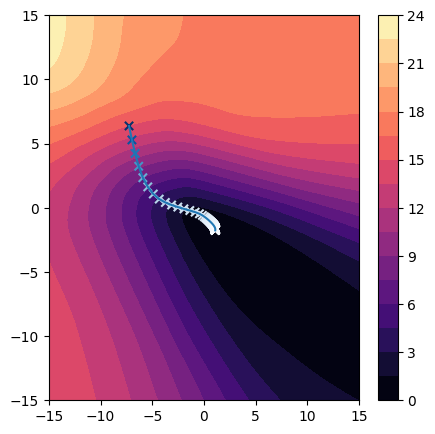

In [45]:
plt.figure(figsize=(5, 5))

plt.contourf(W11, W22, L, 15, cmap='magma')
plt.colorbar()
plt.scatter(history[:, 0], history[:, 1], c=history[:, 1], cmap='Blues', marker='x')
plt.plot(history[:, 0], history[:, 1])

Exception ignored in: <function Animation.__del__ at 0x7c31298c95a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py", line 882, in __del__
    def __del__(self):
KeyboardInterrupt: 


CalledProcessError: ignored

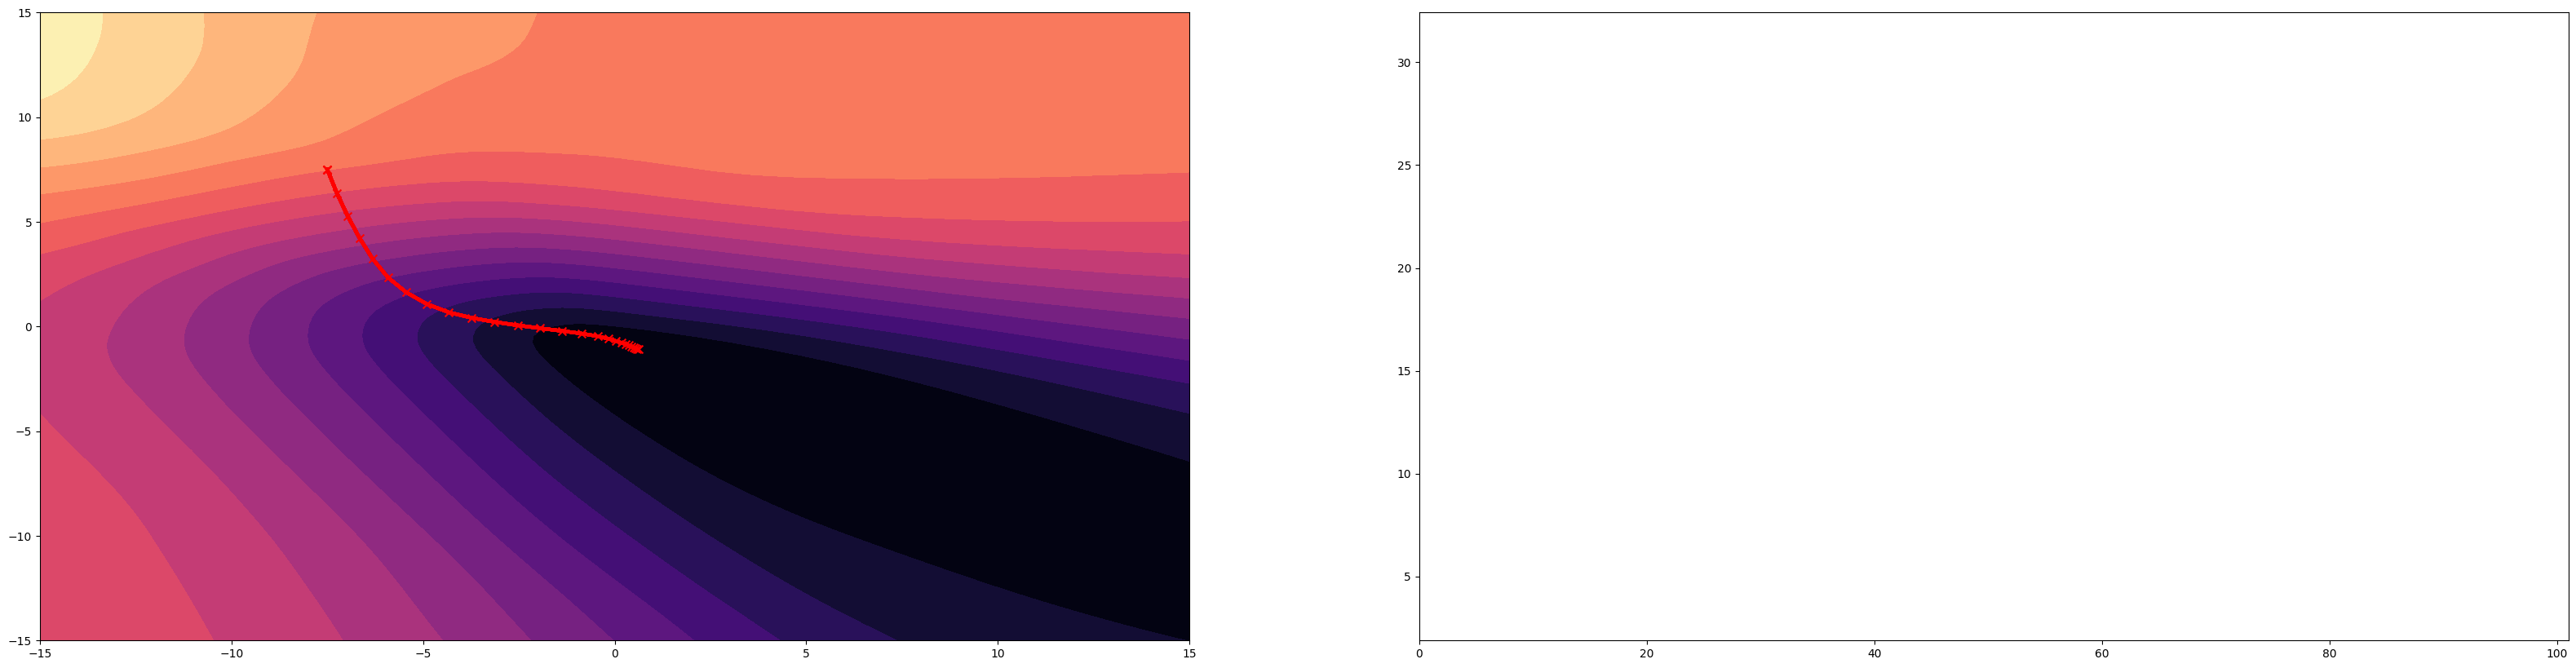

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
ani = FuncAnimation(fig, animate, frames=history, interval=10, repeat=False)

import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=3200)
ani.save('animation.mp4', writer=writer)

In [24]:
import plotly.graph_objects as go

fig = (go.Figure(data=[go.Surface(z=L, x=W11, y=W22, opacity = 1)]))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()